In [1]:
import requests
import timeit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
import pandas as pd
from matplotlib.patches import Ellipse
from scipy.stats import moment as sigma
from scipy import constants
from copy import copy
import os

In [2]:
plt.rcParams.update(plt.rcParamsDefault)

In [3]:
REQUEST_URL = "http://0.0.0.0:8000/" 
REQUEST_HEADERS = {'Content-Type': 'application/json', 'x-api-key': os.getenv("ASTRA_API_KEY")}

def request(endpoint, data):
    response = requests.post(REQUEST_URL + endpoint, headers=REQUEST_HEADERS, json=data)
    print(f"Response code {response.status_code}")
    return response.json()

# Requesting data

Refer to the [API documenation](http://localhost:8000/docs) for a full list and description of input parameters.

In [4]:
generator_parameters = { 
    "particle_count": 10000, 
    "time_spread": False,
    "dist_z": "gauss",
    "sig_Ekin": 1.5,
    "Nemit_x": 1.0E0,
    "sig_y": 0.75E0,
    "Nemit_y": 1.0E0,
    "C_sig_z": 2.0,
    "sig_z": 1.0E0,
    "sig_x":0.75E0,
    "Ref_Ekin":2.0E0,
}

In [5]:
response = request("generate", generator_parameters)

Response code 200


In [6]:
print(response.keys())
data = pd.DataFrame(response['particles'])
data

dict_keys(['timestamp', 'particles', 'input_ini'])


,x,y,z,px,py,pz,clock,macro_charge,particle_index,status_flag
0,0.000000,0.000000,0.000000,0.000000,0.000000,2.458457e+06,0.0,-0.0001,1,5
1,0.000375,0.000000,0.000500,0.000000,0.000000,0.000000e+00,0.0,-0.0001,1,3
2,0.000000,0.000375,-0.000500,0.000000,0.000000,0.000000e+00,0.0,-0.0001,1,3
3,0.000750,0.000000,0.001000,0.000000,0.000000,0.000000e+00,0.0,-0.0001,1,3
4,0.000000,0.000750,-0.001000,0.000000,0.000000,0.000000e+00,0.0,-0.0001,1,3
...,...,...,...,...,...,...,...,...,...,...
9995,-0.000230,0.000200,0.001039,720.628222,790.297436,-5.024867e+02,0.0,-0.0001,1,5
9996,-0.000349,0.000053,0.000387,489.305531,425.467807,4.740510e+02,0.0,-0.0001,1,5
9997,-0.000478,-0.000092,-0.000124,304.346705,156.163781,-1.788604e+03,0.0,-0.0001,1,5
9998,-0.000622,-0.000241,-0.000672,139.755321,-89.950328,2.307884e+03,0.0,-0.0001,1,5


In [7]:
print(response['input_ini'])

&INPUT
    Add = false
    N_add = 0
    IPart = 10000
    Species = 'electrons'
    Probe = true
    Noise_reduc = true
    Q_total = 1.0
    Cathode = false
    High_res = true
    Ref_zpos = 0.0
    Dist_z = 'gaussian'
    Dist_pz = 'gauss'
    Dist_x = 'gauss'
    Dist_px = 'gauss'
    Dist_y = 'gauss'
    Dist_py = 'gauss'
    cor_Ekin = 0.0
    cor_px = 0.0
    cor_py = 0.0
    Ref_Ekin = 2.0
    sig_Ekin = 1.5
    sig_x = 0.75
    sig_y = 0.75
    sig_z = 1.0
    C_sig_z = 2.0
    Nemit_x = 1.0
    Nemit_y = 1.0
    FNAME = '/app/data/generator/1707388059.723158.ini'
/


In [8]:
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

In [9]:
x = data.loc[:, 'x'].values*1e3
y = data.loc[:, 'y'].values*1e3
z = data.loc[:, 'z'].values*1e3
px = data.loc[:, 'px'].values
py = data.loc[:, 'py'].values
pz = data.loc[:, 'pz'].values

# Views

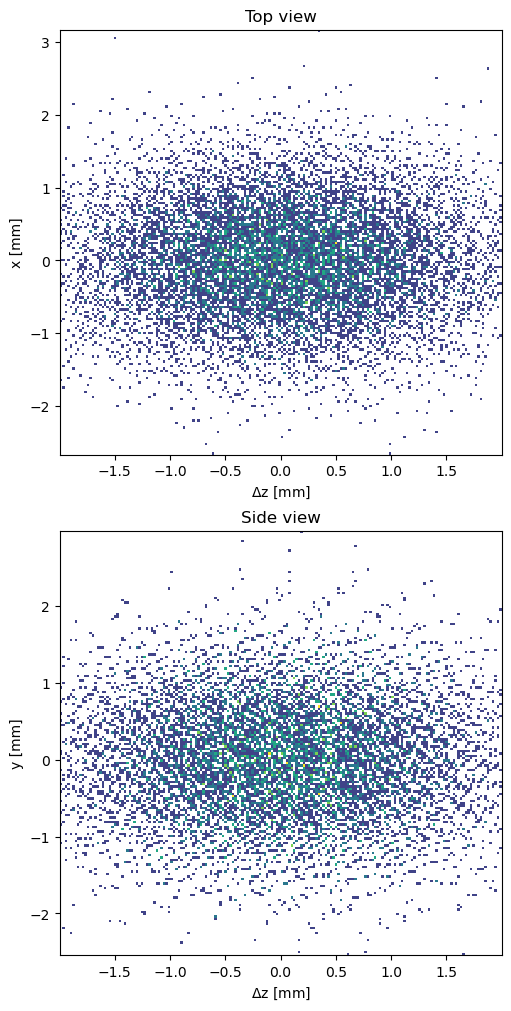

In [10]:
fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(5, 10), constrained_layout=True)

ax_1.hist2d(z, x, (180, 180), cmap=white_viridis)
ax_1.title.set_text('Top view')
ax_1.set_xlabel(r'$\Delta$z [mm]'); ax_1.set_ylabel('x [mm]')

ax_2.hist2d(z, y, (180, 180), cmap=white_viridis)
ax_2.title.set_text('Side view')
ax_2.set_xlabel(r'$\Delta$z [mm]'); ax_2.set_ylabel('y [mm]')

# fig.delaxes(ax_4)

plt.show()

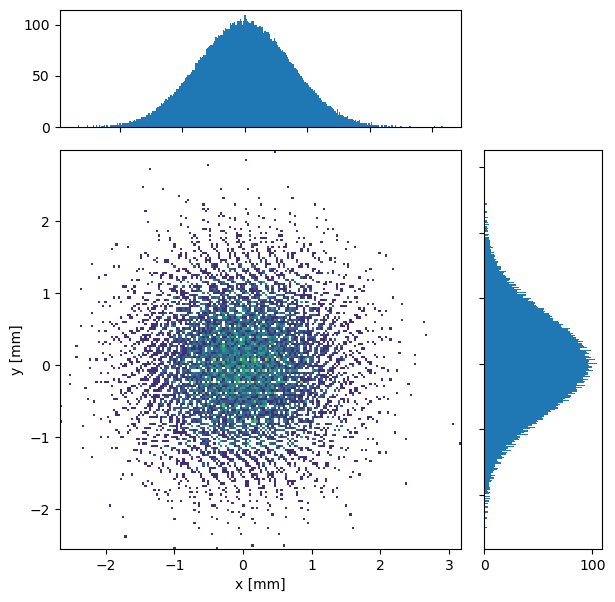

In [11]:
fig = plt.figure(figsize=(7, 7))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_joint.hist2d(x, y, (180, 180), cmap=white_viridis)
ax_joint.set_xlabel('x [mm]'); ax_joint.set_ylabel('y [mm]')

ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])
ax_marg_x.hist(x, bins=300)
ax_marg_y.hist(y, bins=300, orientation="horizontal")

plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

plt.show()

# Transverse phase spaces

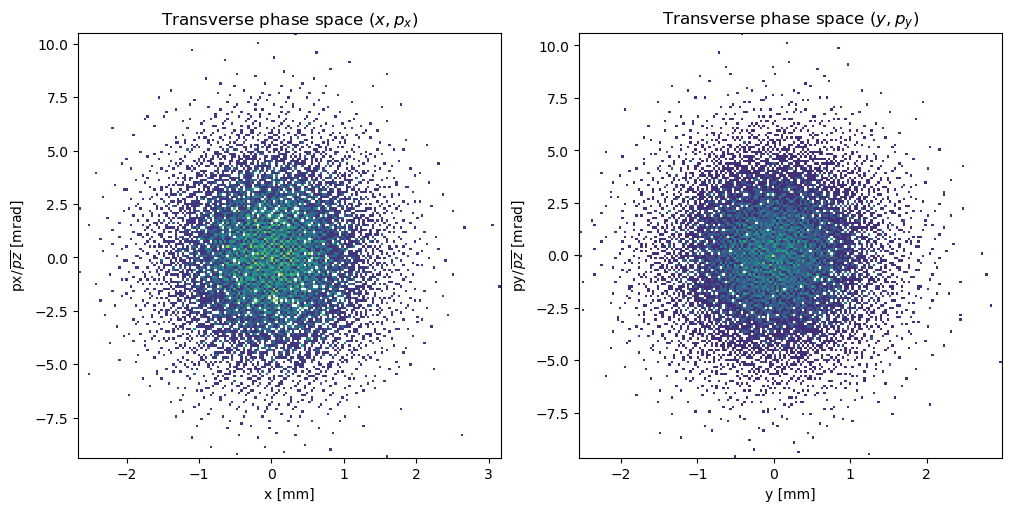

In [12]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

ax_1.hist2d(x, px/np.mean(pz), (180, 180), cmap=white_viridis)
ax_1.title.set_text(r'Transverse phase space $(x, p_x)$')
ax_1.set_xlabel('x [mm]'); ax_1.set_ylabel(r'px/$\,\overline{pz}$ [mrad]')

ax_2.hist2d(y, py/np.mean(pz), (180, 180), cmap=white_viridis)
ax_2.title.set_text(r'Transverse phase space $(y, p_y)$')
ax_2.set_xlabel('y [mm]'); ax_2.set_ylabel(r'py/$\,\overline{pz}$ [mrad]')

plt.show()

# Longitudinal phase space

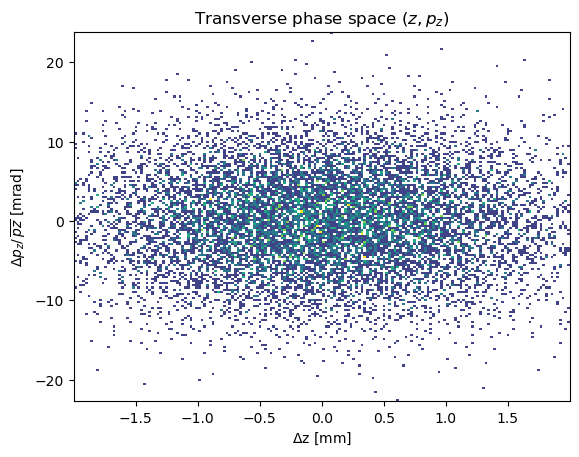

In [13]:
fig, ax = plt.subplots()

momenta = pz/np.mean(pz) 
valid = np.logical_and(-1e2 < momenta, momenta < 1e2)

ax.hist2d(z[valid], momenta[valid], (180, 180), cmap=white_viridis)
ax.title.set_text(r'Transverse phase space $(z, p_z)$')
ax.set_xlabel(r'$\Delta $z [mm]'); ax.set_ylabel(r'$\Delta p_z/\,\overline{pz}$ [mrad]')

plt.show()

In [14]:
np.mean(pz)

247.11510870290155

# Emittance

In [15]:
def emittance(coordinates, momentum):
    moment_coordinates = np.mean(coordinates**2) - np.mean(coordinates)**2
    moment_momentum = np.mean(momentum**2) - np.mean(momentum)**2
    moment_mixed = np.mean(coordinates*momentum) - np.mean(coordinates)*np.mean(momentum)
    
    return np.sqrt(moment_coordinates * moment_momentum - moment_mixed**2)

In [16]:
emittance_x = np.pi * emittance(x, px/np.mean(pz))
emittance_x 

6.496418932815118

In [17]:
emittance_y = np.pi/np.mean(pz) * emittance(y, py)
emittance_y 

6.496418932815138

# Simulation Request

In [18]:
cavity_table = pd.read_csv("./data/cavity_E_field.dat", names=['z', 'v'], sep=" ")
bucking_table = pd.read_csv("./data/bucking_B_field.dat", names=['z', 'v'], sep=" ")
main_table = pd.read_csv("./data/main_B_field.dat", names=['z', 'v'], sep=" ")
solenoid_table = pd.read_csv("./data/solenoid_B_field.dat", names=['z', 'v'], sep=" ")

In [21]:
solenoid_table

,z,v
0,-0.50000,0.000302
1,-0.49625,0.000304
2,-0.49250,0.000307
3,-0.48875,0.000309
4,-0.48500,0.000311
...,...,...
396,0.98500,0.000569
397,0.98875,0.000560
398,0.99250,0.000551
399,0.99625,0.000543


In [19]:
generator_parameters['time_spread'] = True
response = request("generate", generator_parameters)

Response code 200


In [20]:
distribution_timestamp = response['timestamp']
distribution_timestamp

'1707388061.618324'

In [32]:
body = { 
    'run_specs': {
        'particle_file_name': distribution_timestamp,
        'rms_laser_spot_size': 0.1,
    },
    'space_charge': {
        'use_space_charge': False,
        'z_trans': 0.1
    },
    'cavities': [
        {'phase': 90, 'z_0': 0.0, 'field_table': cavity_table.to_dict('list')},
    ],
    'solenoids': [
        {
            'field_table': solenoid_table.to_dict('list'), 
            'max_field_strength': solenoid_table.max()['v']
        },
    ]
}

In [33]:
response = request("simulate", body)

Response code 200


In [34]:
print(response['input_ini'])

&NEWRUN
    Version = 4
    Head = 'Simulation run at time 10:16:27 date 2024-02-08'
    RUN = 1
    Qbunch = 0.1
    Q_Schottky = 0.0
    XYrms = 0.1
    Trms = -1.0
    H_min = 0.0
    H_max = 0.001
    Max_step = 100000
    Z_Cathode = 0.0
    Track_All = true
    Auto_Phase = true
    Distribution = '/app/data/generator/1707388061.618324.ini'
/

&OUTPUT
    ZSTART = 0.0
    ZSTOP = 1.0
    Zemit = 100
    Zphase = 1
    High_res = true
    RefS = true
    EmitS = true
    Tr_emitS = true
    PhaseS = true
/

&CHARGE
    LSPCH = false
    z_trans = 0.1
    Lmirror = true
    Nrad = 32
    Cell_var = 2.0
    Max_Scale = 0.05
    Max_Count = 40
    Exp_Control = 0.1
    L2D_3D = true
/

&CAVITY
    LEfield = true

    Nue(1) = 1.3
    C_pos(1) = 0.0
    C_smooth(1) = 10
    C_higher_order(1) = true
    Phi(1) = 90.0
    MaxE(1) = 130.0
    File_Efield(1) = 'C1_E.dat'
/

&SOLENOID
    LBfield = true

    S_smooth(1) = 10
    MaxB(1) = 0.1798372446609468
    File_Bfield(1) = 'S1_B.dat'


In [35]:
print(response['run_output'])

 --------------------------------------------------------------------------

               Astra - A space charge tracking algorithm 
                             Version 4.0              
                         DESY,  Hamburg 2022          
                          8. 2.2024  10:29

     Parameter file is:  /app/data/simulation/1707388197.282315/run.in     
     Simulation run at time 10:16:27 date 2024-02-08                                 

 Initialize element settings:
     neglecting space charge forces 

 --------------------------------------------------------------------------
 Cavity:

     Reading cavity field data from:      C1_E.dat                                                                        
     field smoothing is applied
     Cavity Frequency               f =    1.300     GHz
     maximum gradient                      130.0     MV/m
     at                                    0.000     m
     estimated average gradient            57.43     MV/m
     nomina

In [36]:
data = pd.DataFrame(response['particles'])

x = data.loc[:, 'x'].values*1e3
y = data.loc[:, 'y'].values*1e3
z = data.loc[:, 'z'].values*1e3
px = data.loc[:, 'px'].values
py = data.loc[:, 'py'].values
pz = data.loc[:, 'pz'].values

data

,x,y,z,px,py,pz,clock,macro_charge,particle_index,status_flag
0,8.943622e-09,-3.602434e-09,1.008199,0.007718,-0.002270,1.131311e+06,3.663255,-0.00001,1,5
1,-7.068360e-05,-6.302393e-04,0.011471,-53.160854,-914.059131,9.692012e+04,0.000500,-0.00001,1,3
2,-1.203697e-04,-1.071746e-04,-0.014806,-368.940970,-347.947427,-1.012511e+05,-0.000500,-0.00001,1,3
3,-6.731283e-04,-1.496938e-03,0.020592,-1030.509558,-2592.475255,1.901660e+05,0.001000,-0.00001,1,3
4,-3.193819e-04,-1.300023e-03,-0.034554,-425.583212,-2244.257632,-2.078103e+05,-0.001000,-0.00001,1,3
...,...,...,...,...,...,...,...,...,...,...
9995,4.458853e-04,-5.358273e-07,-0.087604,451.877840,-46.671092,-4.033289e+05,-0.001832,-0.00001,1,5
9996,7.732537e-04,3.463452e-04,0.035911,1599.361867,752.817691,3.952820e+05,0.002151,-0.00001,1,5
9997,-9.901806e-05,6.391393e-04,0.008334,-167.696841,814.344342,6.841808e+04,0.000387,-0.00001,1,5
9998,1.407057e-04,-1.147303e-04,-0.012468,623.444649,-400.439647,-8.666418e+04,-0.000476,-0.00001,1,5


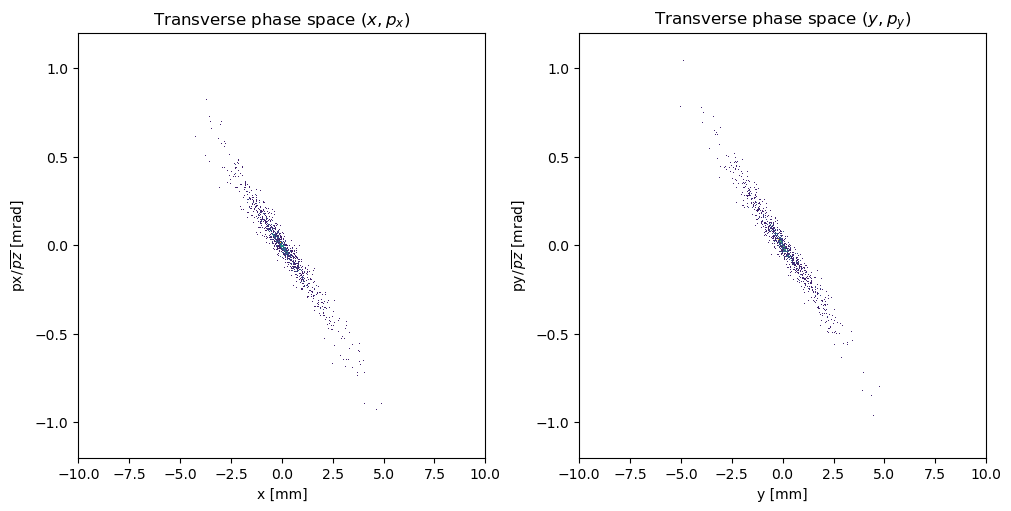

In [37]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

bins = 1000
x_lim = 10
y_lim = 1.2

ax_1.hist2d(x, px/np.mean(pz), (bins, bins), cmap=white_viridis)
ax_1.title.set_text(r'Transverse phase space $(x, p_x)$')
ax_1.set_xlabel('x [mm]'); ax_1.set_ylabel(r'px/$\,\overline{pz}$ [mrad]')
ax_1.set_xlim(left=-x_lim, right=x_lim)
ax_1.set_ylim(bottom=-y_lim, top=y_lim)

ax_2.hist2d(y, py/np.mean(pz), (bins, bins), cmap=white_viridis)
ax_2.title.set_text(r'Transverse phase space $(y, p_y)$')
ax_2.set_xlabel('y [mm]'); ax_2.set_ylabel(r'py/$\,\overline{pz}$ [mrad]')
ax_2.set_xlim(left=-x_lim, right=x_lim)
ax_2.set_ylim(bottom=-y_lim, top=y_lim)

plt.show()

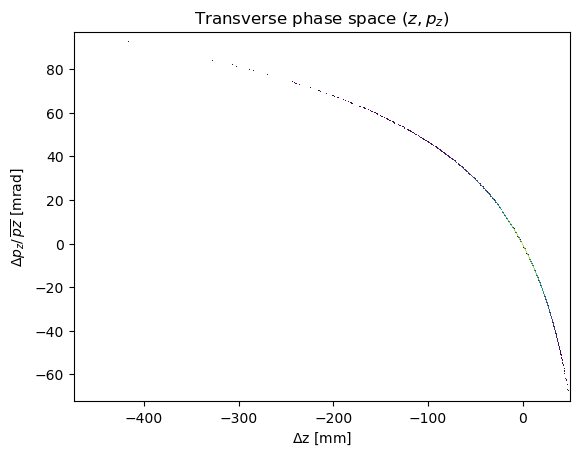

In [38]:
fig, ax = plt.subplots()

bins = 500
momenta = pz/np.mean(pz) 
valid = np.logical_and(-1e2 < momenta, momenta < 1e2)

ax.hist2d(z[valid], momenta[valid], (bins, bins), cmap=white_viridis)
ax.title.set_text(r'Transverse phase space $(z, p_z)$')
ax.set_xlabel(r'$\Delta $z [mm]'); ax.set_ylabel(r'$\Delta p_z/\,\overline{pz}$ [mrad]')

plt.show()

In [39]:
pd.DataFrame(response['emittance_x'])

,z,t,mean,position_rms,angle_rms,emittance,correlation
0,0.010000,0.034024,9.286000e-07,0.10350,0.74012,0.13372,0.69396
1,0.019982,0.068024,9.392200e-07,0.11399,1.44520,0.13361,1.42230
2,0.030000,0.102410,1.091300e-06,0.13222,2.23730,0.13346,2.22030
3,0.039987,0.137410,1.490100e-06,0.15769,2.78960,0.13336,2.77110
4,0.050000,0.174210,2.129700e-06,0.18230,1.70390,0.13339,1.65650
...,...,...,...,...,...,...,...
94,0.950000,3.478500,-9.896800e-04,1.13250,1.81500,1.04640,1.76550
95,0.960000,3.515400,-9.673500e-04,1.14970,1.81480,1.04710,1.76670
96,0.970000,3.552400,-9.556300e-04,1.16690,1.81080,1.01130,1.76720
97,0.980000,3.589300,-9.672200e-04,1.18400,1.81080,1.02580,1.76730


In [40]:
pd.DataFrame(response['emittance_y'])

,z,t,mean,position_rms,angle_rms,emittance,correlation
0,0.010000,0.034024,0.000001,0.10350,0.74015,0.13370,0.6940
1,0.019982,0.068024,0.000001,0.11399,1.44530,0.13360,1.4224
2,0.030000,0.102410,0.000001,0.13222,2.23720,0.13344,2.2202
3,0.039987,0.137410,0.000002,0.15768,2.78950,0.13334,2.7709
4,0.050000,0.174210,0.000003,0.18228,1.70360,0.13336,1.6562
...,...,...,...,...,...,...,...
94,0.950000,3.478500,-0.000394,1.13260,1.80960,1.00570,1.7638
95,0.960000,3.515400,-0.000409,1.14980,1.80950,1.01460,1.7643
96,0.970000,3.552400,-0.000400,1.16690,1.81310,1.06160,1.7651
97,0.980000,3.589300,-0.000383,1.18410,1.81270,1.05980,1.7662


In [41]:
pd.DataFrame(response['emittance_z'])

,z,t,E_kin,position_rms,delta_E_rms,emittance,correlation
0,0.010000,0.034024,2.10560,0.29481,8.4065,0.44478,8.270
1,0.019982,0.068024,1.88120,0.29626,9.2115,0.44349,9.089
2,0.030000,0.102410,1.43120,0.29913,12.0760,0.43911,11.986
3,0.039987,0.137410,0.92815,0.30854,17.4990,0.42821,17.444
4,0.050000,0.174210,0.55633,0.34748,25.3580,0.42400,25.329
...,...,...,...,...,...,...,...
94,0.950000,3.478500,0.72499,34.69800,181.5100,2723.00000,163.660
95,0.960000,3.515400,0.72499,35.13100,181.5100,2757.80000,163.650
96,0.970000,3.552400,0.72499,35.56300,181.5100,2792.60000,163.640
97,0.980000,3.589300,0.72499,35.99600,181.5100,2827.40000,163.630
